# **Ujian Tengah Semester - Machine Learning (Pembelajaran Mesin)**

Nama            : Alya Marliza Koesnanto

No. Absen/NIM   : 04 /  2141720004

Kelas           : TI-3E

# Segmentasi Gambar dengan Clustering

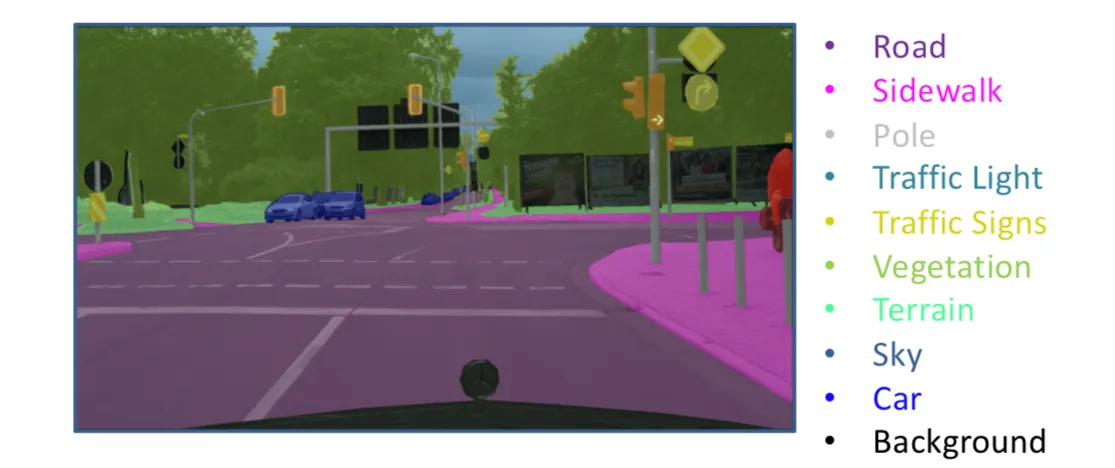

Segmentasi merupakan salah satu cara untuk membedakan antara objek satu dengan objek lainnya dalam suatu citra. Cara ini dapat dilakukan dengan mengelompokkan nilai pixel citra berdasarkan kedekatan warnanya.

Pada UTS kali ini, Anda diminta untuk melakukan segmentasi citra plat nomor kendaraan di Indonesia. Fungsi segmentasi dalam kasus ini adalah mempermudah pembacaan plat nomor kendaraan sebelum proses selanjutnya, seperti pembacaan karakter pada plat nomor.

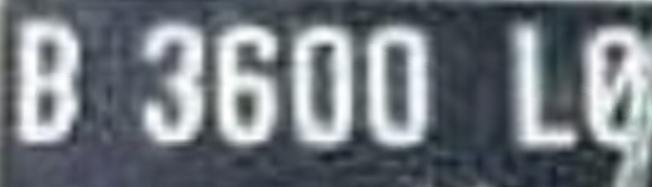

# Ketentuan UTS

Berdasarkan pemaparan kasus, Anda diminta untuk,

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan. [DOWNLOAD](https://storage.googleapis.com/kuliah_mah/dummy.zip)
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
    - Merubah color space
    - Reduksi dimensi
    - dsb
5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi


**Catatan:**
1. Proses loading citra dicontohkan dengan menggunakan library openCV
2. Secara default, openCV akan memuat citra dalam format BGR

# Kode Bantuan

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab

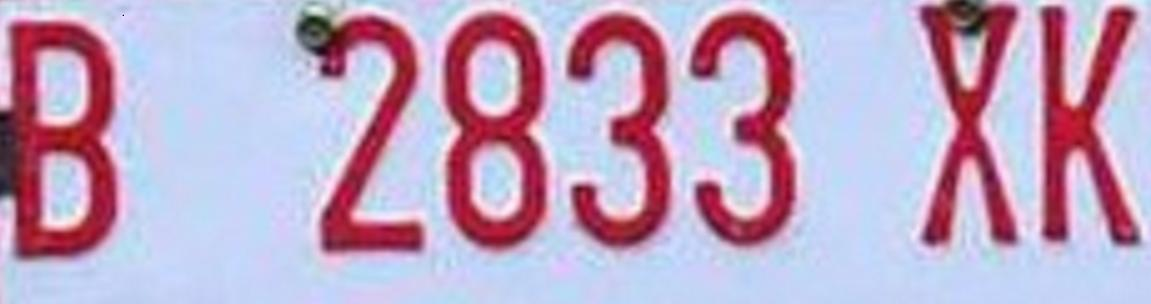

In [ ]:
# Load Gambar
img = cv2.imread('2.jpeg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img) # khusus google colab karena ada issue

In [ ]:
h, w, ch= img.shape
print(h)
print(w)
print(ch)

304
1151
3


In [ ]:
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(349904, 3)

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

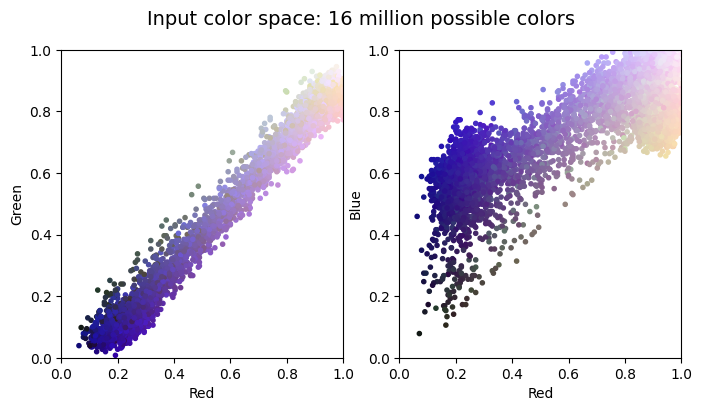

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

# Contoh Hasil Yang Diharapkan

Text(0.5, 1.0, '2-color Image')

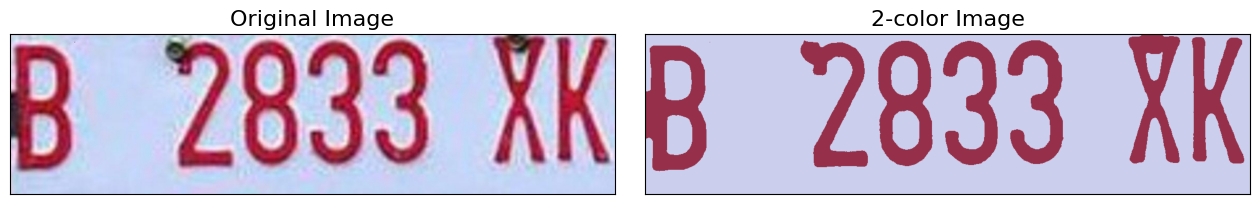

In [ ]:
img_recolored = new_colors.reshape(img.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img_rgb)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(img_recolored)
ax[1].set_title('2-color Image', size=16)

## **Jawaban**

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan.

 **Jawaban:**

* 17-E-4172-QC-11-18_jpg.rf.242a2fe2326bfdc57b7473d7a998c351.jpg
* 27-E-3524-PAG-09-21_jpeg.rf.e30aee9dd8939945334bd78eabb7501e.jpg
* B2520XK_PNG.rf.4e22939a8917f509074397176d67c5e5.jpg
* B3326UB_png.rf.ae55e0c0bf99c732265edf021f844bf9.jpg
* B5571SA_PNG.rf.1886d7f87e9c5f4e9eb170e1c04656c6.jpg

2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.

**Jawaban:**

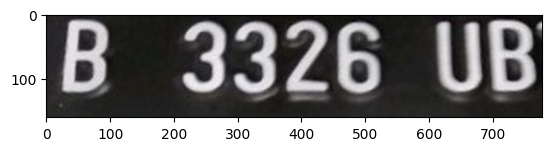

161
778
3


C:\Users\ALYA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


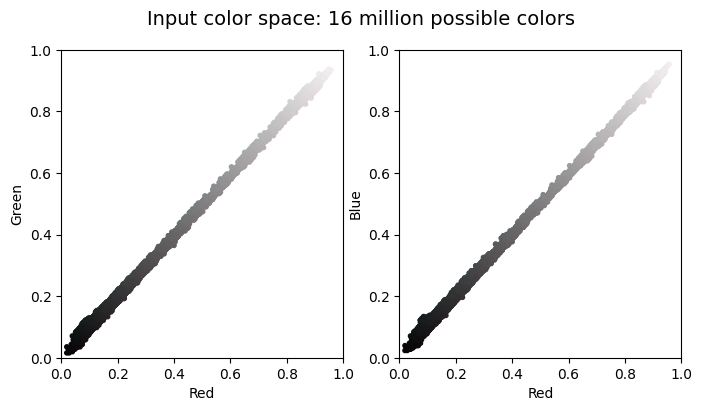

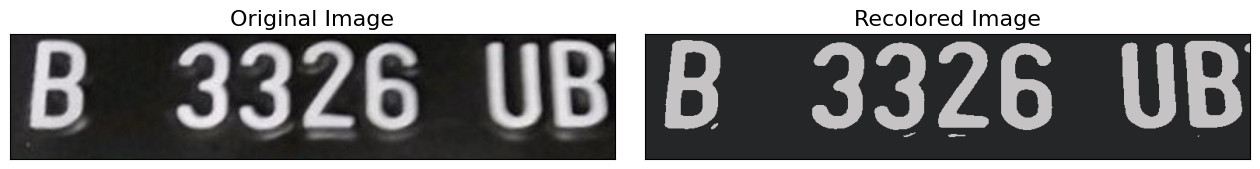

In [4]:
# Import Library
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load Gambar
img = cv2.imread('B3326UB_png.rf.ae55e0c0bf99c732265edf021f844bf9.jpg')

# Tampilkan gambar
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

h, w, ch = img.shape
print(h)
print(w)
print(ch)

data = img / 255.0
data = data.reshape(h * w, ch)

def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

plot_pixels(data, title='Input color space: 16 million possible colors')

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
img_recolored = new_colors.reshape((h, w, ch))

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(img_recolored)
ax[1].set_title('Recolored Image', size=16)
plt.show()

3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.

**Jawaban:**

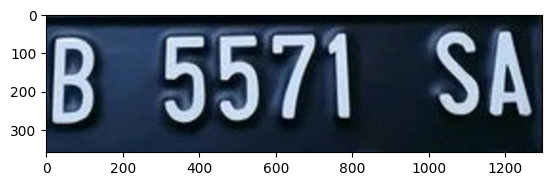

C:\Users\ALYA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


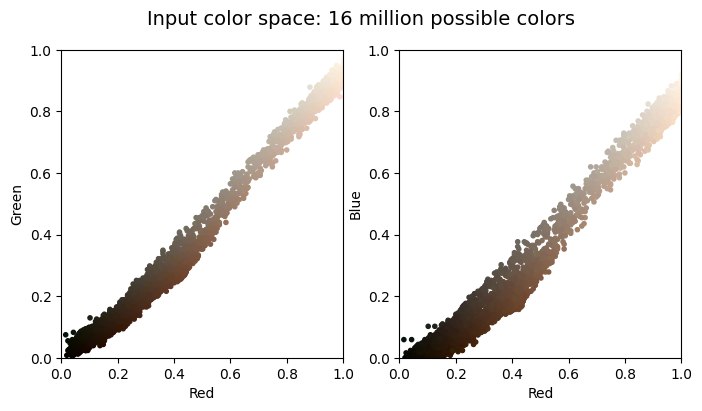

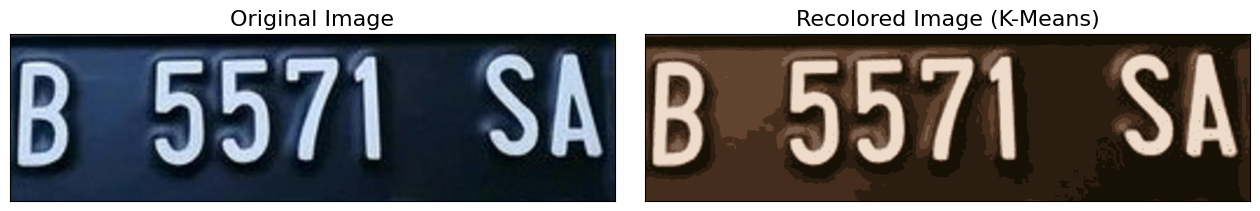

In [7]:
# Import Library
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load Gambar
img = cv2.imread('B5571SA_PNG.rf.1886d7f87e9c5f4e9eb170e1c04656c6.jpg')

# Tampilkan gambar
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

h, w, ch = img.shape

data = img / 255.0
data = data.reshape(h * w, ch)

def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # Pilih subset acak
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

# Tampilkan distribusi warna sebelum segmentasi
plot_pixels(data, title='Input color space: 16 million possible colors')

# Lakukan segmentasi warna menggunakan K-Means
kmeans = KMeans(n_clusters=8)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_
labels = kmeans.labels_
img_recolored = new_colors[labels].reshape((h, w, ch))

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(img_recolored)
ax[1].set_title('Recolored Image (K-Means)', size=16)
plt.show()



4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
 * Merubah color space
 * Reduksi dimensi
 * dsb

**Jawaban:**

A. Merubah Color Space

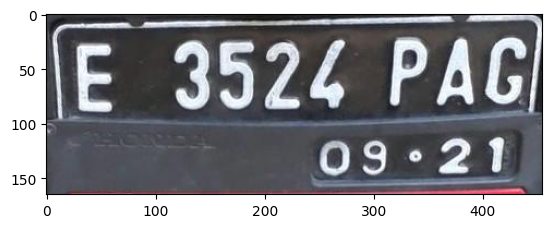

C:\Users\ALYA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


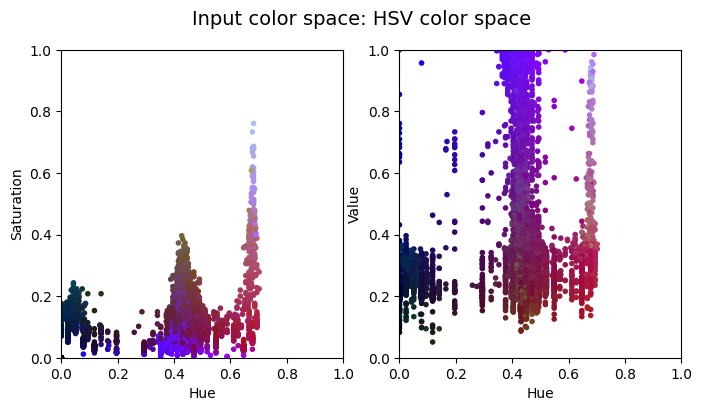

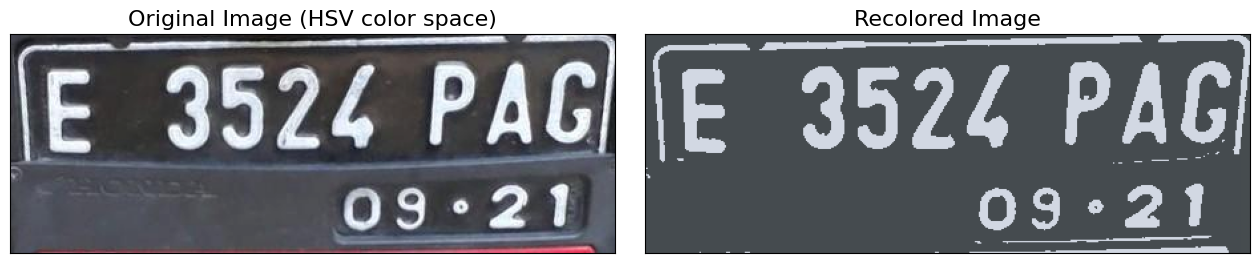

In [17]:
# Import Library
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load Gambar
img = cv2.imread('27-E-3524-PAG-09-21_jpeg.rf.e30aee9dd8939945334bd78eabb7501e.jpg')

# Tampilkan gambar
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# Ubah warna citra dari BGR ke HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

h, w, ch = img_hsv.shape

data = img_hsv / 255.0
data = data.reshape(h * w, ch)

def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    H, S, V = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(H, S, color=colors, marker='.')
    ax[0].set(xlabel='Hue', ylabel='Saturation', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(H, V, color=colors, marker='.')
    ax[1].set(xlabel='Hue', ylabel='Value', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

plot_pixels(data, title='Input color space: HSV color space')

# Lakukan segmentasi warna
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

# Konversi citra hasil segmentasi ke format BGR dengan tiga saluran (Blue, Green, Red)
img_recolored_bgr = cv2.cvtColor((new_colors * 255).astype(np.uint8).reshape((h, w, ch)), cv2.COLOR_HSV2BGR)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB))
ax[0].set_title('Original Image (HSV color space)', size=16)
ax[1].imshow(cv2.cvtColor(img_recolored_bgr, cv2.COLOR_BGR2RGB))
ax[1].set_title('Recolored Image', size=16)
plt.show()


B. Reduksi Dimensi

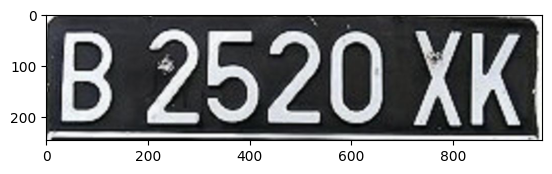

C:\Users\ALYA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


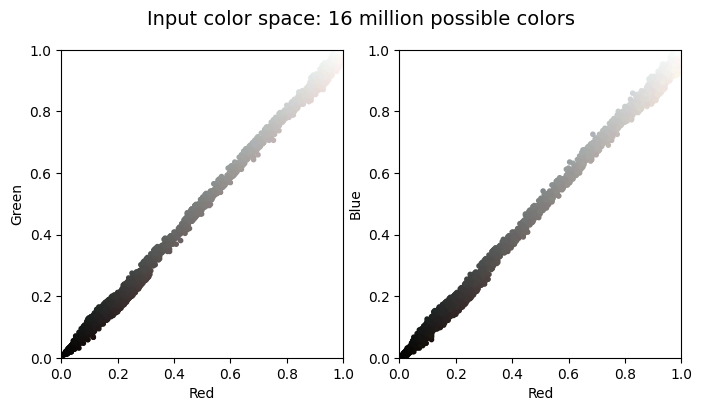

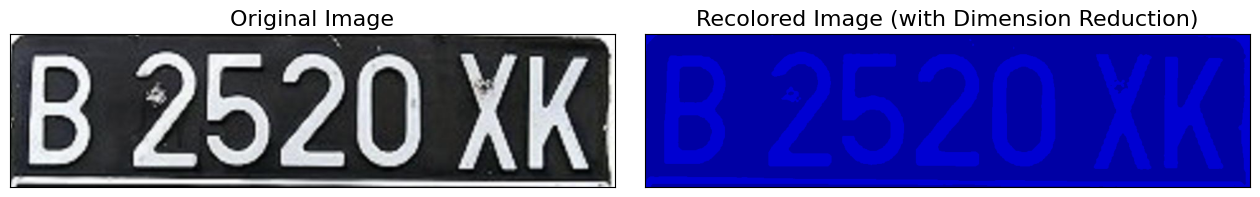

In [4]:
# Import Library
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load Gambar
img = cv2.imread('B2520XK_PNG.rf.4e22939a8917f509074397176d67c5e5.jpg')

# Tampilkan gambar
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

h, w, ch = img.shape

data = img / 255.0
data = data.reshape(h * w, ch)

# Lakukan reduksi dimensi menggunakan PCA
n_components = 2  
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(data)

# Lakukan segmentasi warna pada data yang telah direduksi
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(reduced_data)
new_colors = kmeans.cluster_centers_[kmeans.predict(reduced_data)]

# Bentuk kembali citra yang telah di-segmentasi dan direduksi dimensi ke ukuran asli
img_recolored = new_colors.reshape((h, w, n_components))

# Tambahkan saluran ketiga dengan nilai nol
img_recolored_bgr = np.zeros((h, w, 3), dtype=np.uint8)
img_recolored_bgr[:, :, :n_components] = (img_recolored * 255).astype(np.uint8)

# Fungsi untuk menampilkan citra sebelum segmentasi
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

plot_pixels(data, title='Input color space: 16 million possible colors')

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(img_recolored_bgr, cv2.COLOR_BGR2RGB))
ax[1].set_title('Recolored Image (with Dimension Reduction)', size=16)
plt.show()

5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi

C:\Users\ALYA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


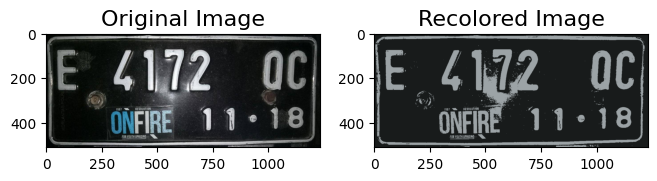

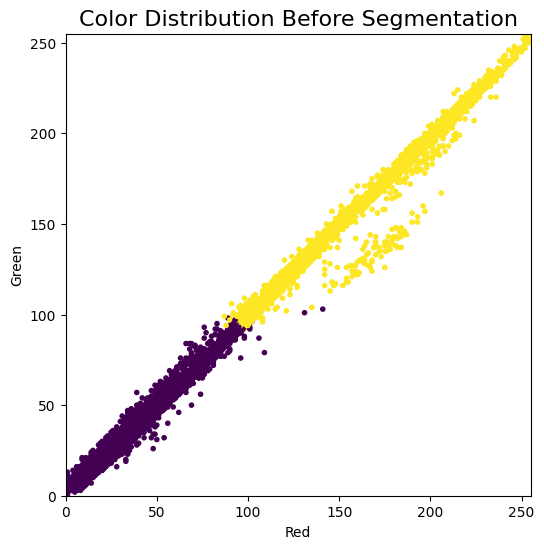

In [6]:
# Import Library
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load Gambar
img = cv2.imread('17-E-4172-QC-11-18_jpg.rf.242a2fe2326bfdc57b7473d7a998c351.jpg')

# Konversi citra dari BGR ke RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Tampilkan gambar asli
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(img_rgb)
plt.title('Original Image', size=16)

# Lakukan segmentasi warna menggunakan K-Means
h, w, ch = img.shape
data = img.reshape((-1, 3))
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

# Dapatkan label kluster untuk setiap pixel
labels = kmeans.predict(data)

# Dapatkan pusat kluster
centers = kmeans.cluster_centers_

# Hasilkan gambar yang direncanakan ulang dengan warna kluster
recolored_img = centers[labels].reshape((h, w, ch)).astype(np.uint8)

# Konversi citra hasil segmentasi ke RGB
recolored_img_rgb = cv2.cvtColor(recolored_img, cv2.COLOR_BGR2RGB)

# Tampilkan gambar hasil segmentasi
plt.subplot(132)
plt.imshow(recolored_img_rgb)
plt.title('Recolored Image', size=16)

# Fungsi untuk menampilkan distribusi warna sebelum segmentasi
def plot_pixels(data, title, colors, N=10000):
    # Pilih subset acak
    idx = np.random.choice(data.shape[0], N, replace=False)
    sample_data = data[idx]
    sample_colors = colors[idx]

    R, G, B = sample_data.T

    plt.figure(figsize=(6, 6))
    plt.scatter(R, G, c=sample_colors, marker='.')
    plt.xlabel('Red')
    plt.ylabel('Green')
    plt.xlim(0, 255)
    plt.ylim(0, 255)
    plt.title(title, size=16)

# Tampilkan distribusi warna sebelum segmentasi
plot_pixels(data, 'Color Distribution Before Segmentation', labels)

plt.show()
